In [20]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('/kaggle/input/floorplan-dataset-zip/floorplan_dataset/1000.png')
print(img.shape)

(256, 256, 3)


In [21]:
category=img[:,:,1]

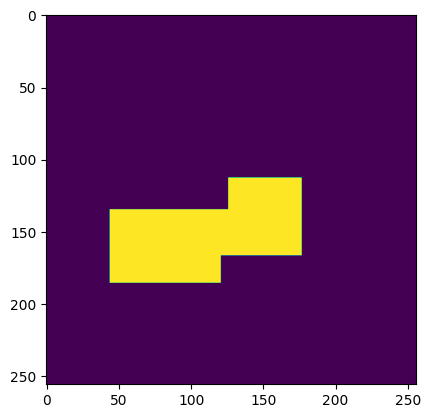

In [22]:
import numpy as np
plt.imshow((category==0).astype(np.uint8)*255)

In [23]:
category.shape

(256, 256)

In [24]:
_rooms=None

[[113  44 186 177   1]
 [ 82  67 130 121   2]
 [141 182 167 213   3]
 [113 182 136 213   4]
 [ 71 110 108 145   7]
 [ 71 150 108 192   8]
 [  0   0 256 256  14]
 [ 66  39 191 218  15]
 [167 136 172 151  16]
 [ 71  67 156 213  17]
 [108 121 169 182  18]]


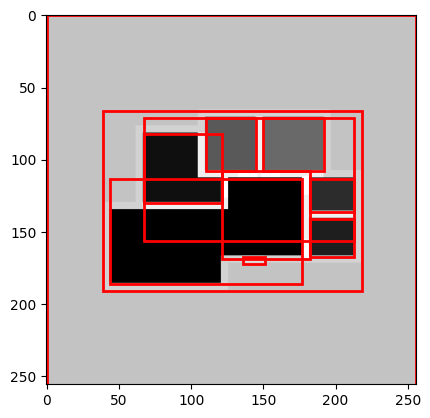

In [27]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('/kaggle/input/floorplan-dataset-zip/floorplan_dataset/1000.png')
#print(img.shape)
category=img[:,:,1]
_rooms=None

from skimage import measure
from scipy import stats
category=category+1
regions=measure.regionprops(category)
rooms=[]

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Display the original image
ax.imshow(category, cmap='gray')
for region in regions:
   # print(region.coords) Check this fully
#     print(stats.mode(
#         category[region.coords[:, 0],
#                       region.coords[:, 1]],
#         axis=None
#     ).mode)
    c = stats.mode(
        category[region.coords[:, 0],
                      region.coords[:, 1]],
        axis=None
    ).mode
    y0, x0, y1, x1 = np.array(region.bbox)
    #print(y0,x0,y1,x1)
    rooms.append([y0, x0, y1, x1, c])
    rect = plt.Rectangle((x0, y0), x1 - x0, y1 - y0, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)
    #break
        
_rooms = np.array(rooms, dtype=int)
print(_rooms)

In [28]:
_rooms

array([[113,  44, 186, 177,   1],
       [ 82,  67, 130, 121,   2],
       [141, 182, 167, 213,   3],
       [113, 182, 136, 213,   4],
       [ 71, 110, 108, 145,   7],
       [ 71, 150, 108, 192,   8],
       [  0,   0, 256, 256,  14],
       [ 66,  39, 191, 218,  15],
       [167, 136, 172, 151,  16],
       [ 71,  67, 156, 213,  17],
       [108, 121, 169, 182,  18]])

In [31]:
import os
import cv2
from skimage import measure
from scipy import stats
import numpy as np
extracted_data=[]

max_categories=9 #Later remove
for i in range(0,10000):
    layout_data=np.zeros((max_categories,5),dtype='float')
    filename=str(i)+'.png'
    image_path=os.path.join('/kaggle/input/floorplan-dataset-zip/floorplan_dataset',filename)
    if os.path.exists(image_path):
        img=cv2.imread(image_path)
        category=img[:,:,1]+1
        _rooms=None
        regions=measure.regionprops(category)
        rooms=[]
        for region in regions:
            c = stats.mode(category[region.coords[:, 0],region.coords[:, 1]],axis=None).mode
            if c<=10:
                y0, x0, y1, x1 = np.array(region.bbox)
                rooms.append([y0, x0, y1, x1, c])
        _rooms = np.array(rooms, dtype=int)
        #Do efficient if possible
        properties_per_room = {
            room[-1]: {
                'category': room[-1],
                'bounding_box': room[0:4]
                #'area': (room[2]-room[0]) * (room[3]-room[1])
            }
            for room in _rooms
        }
        category_index = 0
        for key, value in properties_per_room.items():
            category = value['category']
            bounding_box = value['bounding_box']

#             bottom_right_x, bottom_right_y = bounding_box[-2:]
#             width = bottom_right_x - bounding_box[0]
#             height = bottom_right_y - bounding_box[1]
#             bounding_box_scaled = [bounding_box[0]/256.0, bounding_box[1]/256.0, width/256.0, height/256.0]
            
            bottom_right_y, bottom_right_x = bounding_box[-2:]
            width = bottom_right_x - bounding_box[1]
            height = bottom_right_y - bounding_box[0]
            bounding_box_scaled = [bounding_box[0]/256.0, bounding_box[1]/256.0, width/256.0, height/256.0]
            
            row = [category] + list(bounding_box_scaled)
            layout_data[category_index] = np.array(row, dtype=float)
            category_index+=1
    else:
      print(i," not present")
    extracted_data.append(layout_data)
numpy_array = np.array(extracted_data)
#print(numpy_array)
np.save("/kaggle/working/numpy.npy",numpy_array)

In [32]:
print(numpy_array)

[[[ 1.          0.109375    0.43359375  0.2890625   0.6875    ]
  [ 2.          0.62890625  0.28125     0.20703125  0.234375  ]
  [ 3.          0.20703125  0.44921875  0.1171875   0.12109375]
  ...
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 1.          0.21875     0.171875    0.66015625  0.296875  ]
  [ 2.          0.52734375  0.56640625  0.265625    0.23828125]
  [ 3.          0.1953125   0.171875    0.11328125  0.13671875]
  ...
  [10.          0.77734375  0.56640625  0.265625    0.03125   ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 1.          0.08984375  0.40234375  0.2734375   0.53515625]
  [ 2.          0.57421875  0.26171875  0.18359375  0.25      ]
  [ 3.          0.08984375  0.26171875  0.12109375  0.21484375]
  ...
  [10.          0.

In [41]:
res=np.load('/kaggle/input/layoutgandata/sorted_c1publay.npy',allow_pickle=True)
res

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.4909217 , 0.75149199, 0.84996737, ..., 0.        ,
         0.        , 0.        ],
        [0.45917618, 0.8431566 , 0.59081566, ..., 0.        ,
         0.        , 1.        ],
        [0.49092985, 0.91779285, 0.50557912, ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.49091354, 0.652127  , 0.84995106, ..., 0.        ,
         0.        , 0.        ],
        [0.4

In [40]:
import os
import cv2
from skimage import measure
from scipy import stats
import numpy as np
extracted_data=[]

max_categories=9 #Later remove
for i in range(0,2):
    layout_data=np.zeros((max_categories,14),dtype='float')
    filename=str(i)+'.png'
    image_path=os.path.join('/kaggle/input/floorplan-dataset-zip/floorplan_dataset',filename)
    if os.path.exists(image_path):
        img=cv2.imread(image_path)
        category=img[:,:,1]+1
        _rooms=None
        regions=measure.regionprops(category)
        rooms=[]
        for region in regions:
            c = stats.mode(category[region.coords[:, 0],region.coords[:, 1]],axis=None).mode
            if c<=10:
                y0, x0, y1, x1 = np.array(region.bbox)
                rooms.append([y0, x0, y1, x1, c])
        _rooms = np.array(rooms, dtype=int)
        #Do efficient if possible
        properties_per_room = {
            room[-1]: {
                'category': room[-1],
                'bounding_box': room[0:4]
                #'area': (room[2]-room[0]) * (room[3]-room[1])
            }
            for room in _rooms
        }
        category_index = 0
        for key, value in properties_per_room.items():
            category = value['category']
            bounding_box = value['bounding_box']

#             bottom_right_x, bottom_right_y = bounding_box[-2:]
#             width = bottom_right_x - bounding_box[0]
#             height = bottom_right_y - bounding_box[1]
#             bounding_box_scaled = [bounding_box[0]/256.0, bounding_box[1]/256.0, width/256.0, height/256.0]
            
            bottom_right_y, bottom_right_x = bounding_box[-2:]
            width = bottom_right_x - bounding_box[1]
            height = bottom_right_y - bounding_box[0]
            bounding_box_scaled = [bounding_box[0]/256.0, bounding_box[1]/256.0, width/256.0, height/256.0]
            
            onehot_categories=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
            onehot_categories[category-1]=1
            
            row = list(bounding_box_scaled)+onehot_categories
            layout_data[category_index] = np.array(row, dtype=float)
            category_index+=1
    else:
      print(i," not present")
    extracted_data.append(layout_data)
numpy_array = np.array(extracted_data)
print(numpy_array)
#np.save("/kaggle/working/numpy.npy",numpy_array)

[[[0.109375   0.43359375 0.2890625  0.6875     1.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.62890625 0.28125    0.20703125 0.234375   0.         1.
   0.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.20703125 0.44921875 0.1171875  0.12109375 0.         0.
   1.         0.         0.         0.         0.         0.
   0.         0.        ]
  [0.5078125  0.28125    0.140625   0.109375   0.         0.
   0.         1.         0.         0.         0.         0.
   0.         0.        ]
  [0.33984375 0.28125    0.20703125 0.15625    0.         0.
   0.         0.         0.         0.         0.         1.
   0.         0.        ]
  [0.80859375 0.5        0.22265625 0.0859375  0.         0.
   0.         0.         0.         0.         0.         0.
   0.         1.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.  

In [34]:
onehot_categories=np.zeros((9,),dtype=float)
onehot_categories

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
numpy_array.shape

(70000, 9, 5)

In [1]:
import os

folder_path = "/kaggle/input/floorplan-dataset-zip/floorplan_dataset"  # Adjust the path to your folder

# List files in the folder
files = os.listdir(folder_path)
print(len(files))

80788


In [1]:
import os
import cv2
import numpy as np
from openpyxl import Workbook

total_plot_size_meters = 18  # meters
total_image_size_pixels = 256  # pixels

conversion_factor = total_plot_size_meters / total_image_size_pixels

# Initialize a workbook and select the active worksheet
wb = Workbook()
ws = wb.active

# Write headers for each column
headers = ['Image ID'] + [f'Room {i} Area (sq. meters)' for i in range(10)]
ws.append(headers)

# Iterate through the images
for i in range(80788):
    filename = f"{i}.png"
    image_path = os.path.join('/kaggle/input/floorplan-dataset-zip/floorplan_dataset', filename)

    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        row_data = [i]

        for category in range(10):
            room_mask = (img[:, :, 1] == category).astype(np.uint8)
            area_pixels = np.sum(room_mask)
            area_meters = area_pixels * conversion_factor**2
            row_data.append(area_meters)

        ws.append(row_data)

# Save the workbook
excel_path = '/kaggle/working/room_areas.xlsx'
wb.save(excel_path)


In [1]:
import numpy as np
test=np.load('/kaggle/input/preprocessed-floorplan/numpy.npy',allow_pickle=True)
test.shape

(1000, 9, 5)

In [3]:
 max_box = 0
for doc in test:
    max_box = max(max_box,len(doc))
max_box

9

In [5]:
n_classes=13
for doc in range(len(test)):
    while (len(test[doc])<max_box):
        print("Hello")
        data[doc].append([n_classes-1,0,0,0,0])

In [7]:
orig_data = np.array(test,dtype='float32')
print(orig_data.shape)
test = np.array(test,dtype='float32')
print(test.shape)

(1000, 9, 5)
(1000, 9, 5)


In [17]:
n_row=32
n_col=32
test[:,:,1] = test[:,:,1]/(n_col-1)
test[:,:,2] = test[:,:,2]/(n_row-1)
test[:,:,3] = test[:,:,3]/(n_col-1)
test[:,:,4] = test[:,:,4]/(n_row-1)

In [18]:
test[:,:,1]

array([[0.00352823, 0.0202873 , 0.00667843, ..., 0.        , 0.        ,
        0.        ],
       [0.00705645, 0.01701109, 0.0063004 , ..., 0.02507561, 0.        ,
        0.        ],
       [0.00289819, 0.01852318, 0.00289819, ..., 0.02721774, 0.        ,
        0.        ],
       ...,
       [0.00604839, 0.01600302, 0.00604839, ..., 0.        , 0.        ,
        0.        ],
       [0.00756048, 0.01209677, 0.00756048, ..., 0.        , 0.        ,
        0.        ],
       [0.00718246, 0.01348286, 0.00718246, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [19]:
for i in range(test.shape[0]): #1000
    box_num = test[i].shape[0] #9

    c=0
    for j in test[i]: #j each box in document
        if j[3]==0 and j[4]==0:
            break
        c = c+1

    order = [*list(test[i][0:c,3].argsort()),*range(c,box_num)] # 4 Width (Col)
    test[i] = np.array(test[i,order])
    order = [*list(test[i][0:c,4].argsort()),*range(c,box_num)] # 3 Height (Row)
    test[i] = np.array(test[i,order])
    order = [*list(test[i][0:c,1].argsort()),*range(c,box_num)] # 2 X-Pos (Col)
    test[i] = np.array(test[i,order])
    order = [*list(test[i][0:c,2].argsort()),*range(c,box_num)] # 1 Y-Pos (Row)
    test[i] = np.array(test[i,order])

test = test

In [20]:
test

array([[[8.0000000e+00, 1.0962701e-02, 9.0725804e-03, 5.0403224e-03,
         6.6784276e-03],
        [4.0000000e+00, 1.6381048e-02, 9.0725804e-03, 3.5282257e-03,
         4.5362902e-03],
        [2.0000000e+00, 2.0287298e-02, 9.0725804e-03, 7.5604836e-03,
         6.6784276e-03],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00]],

       [[3.0000000e+00, 6.3004033e-03, 5.5443547e-03, 4.4102822e-03,
         3.6542339e-03],
        [1.0000000e+00, 7.0564514e-03, 5.5443547e-03, 9.5766131e-03,
         2.1295363e-02],
        [8.0000000e+00, 1.7011089e-02, 5.5443547e-03, 7.6864921e-03,
         7.3084678e-03],
        ...,
        [1.0000000e+01, 2.5075605e-02, 1.8271169e-02, 1.0080645e-03,
         8.5685486e-03],
        [0.0000000e+00, 0.000000

In [25]:
n_anchors=(32,32)
input_dim = 2+11+2*(n_anchors[0]+n_anchors[1])
input_dim

141

In [27]:
test = np.array(test,dtype='int')

In [28]:
# One hot encoding
onehot_data = []

for doc in test:
    cur_data = []
    for box in doc:
        cur_cur_data = list(np.zeros(input_dim))
        cur_cur_data[box[0]] = 1
        cur_cur_data[box[1]+n_classes] = 1
        cur_cur_data[box[2]+n_classes+n_col] = 1
        cur_cur_data[box[3]+n_classes+n_col+n_row] = 1
        cur_cur_data[box[4]+n_classes+n_col*2+n_row] = 1
        cur_data.append(cur_cur_data)
    onehot_data.append(cur_data)

onehot_data = np.array(onehot_data, dtype='int')

In [29]:
onehot_data.shape

(1000, 9, 141)

In [36]:
onehot_data.shape

(1000, 9, 141)

In [33]:
# x_data with <bos> and y_data with <eos>
x_data = []
y_data = []
e=0.1
for doc in onehot_data:
    bos = list(np.zeros(input_dim))
    bos[0]=1
    x = [bos,*doc]
    x = np.array(x).T
    x_data.append(x)

    eos = list(np.zeros(input_dim))
    eos[n_classes-1] = 1
    y = [*doc,eos]
    for box in y:
        for k in range(0, n_classes):
            box[k] = (1 - e) * box[k] + e / n_classes
        for k in range(n_classes, n_classes+n_col):
            box[k] = (1 - e) * box[k] + e / n_col
        for k in range(n_classes+n_col, n_classes+n_col+n_row):
            box[k] = (1 - e) * box[k] + e / n_row
        for k in range(n_classes+n_col+n_row, n_classes+2*n_col+n_row):
            box[k] = (1 - e) * box[k] + e / n_col
        for k in range(n_classes+2*n_col+n_row, n_classes+2*n_col+2*n_row):
            box[k] = (1 - e) * box[k] + e / n_row
    y = np.array(y).T
    y_data.append(y)

x_data = np.array(x_data,dtype="float32")
y_data = np.array(y_data,dtype="float32")

In [35]:
x_data[0]

array([[1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)